<div style="background:#d4d6fa; color:#000; padding:10px">
    <p><big><b> Комментарий тимлида: </b></big></p> 
Здравствуй, Фёдор! Меня зовут Москвин Антон! Я буду использовать стандартную цветовую разметку комментариев:
<div class="alert alert-success">
        <strong>👍 Зелёным</strong> цветом я буду выделять удачные и элегантные решения, на которые можно опираться в будущих проектах. 
    </div> 
    <div class="alert alert-warning">
        <strong>⚠️Желтым</strong> будет выделено то, что в следующий раз стоит сделать по-другому. Одно-два таких замечаний в проекте допустимы, но если их будет больше, то нужно будет внести изменения.
    </div>
    <div class="alert alert-danger">
        <strong>⛔️Красным</strong> - то, что необходимо исправить, прежде чем я смогу принять твой проект.
    </div> 
Пожалуйста, не удаляй и не передвигай их.
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Привет! Буду отмечать свои комментарии вот так
</div>

<div class="alert alert-block alert-info">
<b>Изменения:</b> Сразу добавлю, что тут появилось больше графиков и Исследовательского Анализа, который я проводил пока работа была на ревью. Так же я постарался учесть твои комментарии и внести улучшения.
</div>

<div class='alert alert-success'> 👍 вер 2
Хорошо

# Описание

**Задача бизнеса:** Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. 

**Цель проекта:** разработать модель, которая будет предсказывать возможный уход клиента.

**Данные:** Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

**Описание данных:**

Данные состоят из файлов, полученных из разных источников:

- `contract.csv` — информация о договоре;
- `personal.csv` — персональные данные клиента;
- `internet.csv` — информация об интернет-услугах;
- `phone.csv` — информация об услугах телефонии.

Во всех файлах столбец `customerID` содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

**Описание услуг:**

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).  

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

**Описание столбцов:**

- BeginDate – дата начала пользования услугами
- EndDate – дата окончания пользования услугами
- Type – тип оплаты: ежемесячный, годовой и тд
- PaperlessBilling – безналичный расчет
- PaymentMethod – способ оплаты
- MonthlyCharges – ежемесячные траты на услуги
- TotalCharges – всего потрачено денег на услуги
- Dependents – наличие иждивенцев
- Senior Citizen – наличие пенсионного статуса по возрасту
- Partner – наличие супруга(и)
- MultipleLines – наличие возможности ведения параллельных линий во время звонка

<div class='alert alert-success'> 👍
Спасибо за описание задачи, важно держать такую информацию перед глазами!


# Открытие и изучение файлов

In [1]:
!pip install pandas_profiling

In [2]:
!pip install -- linear-tree

## Импорт

In [3]:
import pandas as pd
import pandas_profiling
import numpy as np
import sys
import time

from IPython.display import Markdown
import nbformat
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score

from sklearn.linear_model import LogisticRegression as LR, RidgeClassifier as RC, Ridge
from sklearn.tree import DecisionTreeClassifier as DTC
from catboost import Pool, CatBoostClassifier as CBC, cv
from lineartree import LinearTreeClassifier as LTC, LinearForestClassifier as LFC
from lineartree import LinearBoostClassifier as LBC

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
plt.style.use('default')
#plt.style.use('dark_background') # я работаю в темной теме, поэтому использую эту настройку.
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

s = 121222

## Обзор данных

In [4]:
try:
    contract = pd.read_csv('/datasets/final_provider/contract.csv')
    personal = pd.read_csv('/datasets/final_provider/personal.csv')
    internet = pd.read_csv('/datasets/final_provider/internet.csv')
    phone = pd.read_csv('/datasets/final_provider/phone.csv')

except:
    contract = pd.read_csv('contract.csv')
    personal = pd.read_csv('personal.csv')
    internet = pd.read_csv('internet.csv')
    phone = pd.read_csv('phone.csv')

<div class='alert alert-success'> 👍
Здорово что владеешь конструкцией обработки исключений. 

In [5]:
dfs = [contract, personal, internet, phone]
dfs_names = ['contract', 'personal', 'internet', 'phone']

Проведу EDA (разведывательный анализ данных) с помощью библиотеки pandas_profiling.

In [6]:
for i in range(len(dfs)):
    display(dfs[i].profile_report(title=dfs_names[i]))

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<div class='alert alert-success'> 👍
Классное исследование данных, очень поравдовало что кто-то знает о такой возможности 

## Вывод

1. В таблицах contract и personal одинаковое количество строк - 7043. В таблице internet 5517, в phone 6361.
2. Отсутсвуют пропуски и дубликаты.
3. Все колонки в таблицах кроме "MonthlyCharges" имеют тип object, даже если там значения int, float или datetime. (требуется изменение типа данных в столбцах.)
4. Так же есть булевые значания в виде Yes-No их можно будет привести к 1-0 для удобной обработки и экономии памяти. Так же это упростит обучение модели.
5. Все значения "customerID" уникальные, значит пользователи не повторяются.
6. Значения EndDate: 
  - Имеются 5174 пользователя, которые не прерывали контракт.
  - Все остальные распределяються по 4 последним месяцам примерно поровну:
    - Месяц. / Количество пользователей.
    - 2019-10 / 458
    - 2019-11 / 485
    - 2019-12 / 466
    - 2020-01 / 460
  - Это выглядит странно, с учётом того что данные представлены за несколько лет. (как будто раньше никто не уходил, либо данные об прекращении обслуживания не заносились в таблицу)
7. Во всех столбцах с датой имеется только год и месяц, день везде указан 1, а время 0.
8. Отсутствует целевой признак "Клиент прекратил обслуживание." Его можно вывести из столбца "EndDate"

<div class='alert alert-success'> 👍 вер 2
Выводы вполне корректны.

# Предобработка и EDA

Добавлю функции для преобразования данных.

In [1]:
def to_float(df,_):
    '''Функция преобразует формат столбца в минимально подходящий формат float
    на вход подаётся название датафрейма и столбца.'''
    df[_] = pd.to_numeric(df[_], downcast='float',errors='coerce')
    
def to_uint(df,_):
    '''Функция преобразует формат столбца в минимально подходящий формат uint
    на вход подаётся название датафрейма и столбца.'''
    df[_] = pd.to_numeric(df[_], downcast='unsigned',errors='coerce')

def to_int(df,_):
    '''Функция преобразует формат столбца в минимально подходящий формат int
    на вход подаётся название датафрейма и столбца.'''
    df[_] = pd.to_numeric(df[_], downcast='integer',errors='coerce')

## Таблица contract

In [8]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


### BeginDate

In [9]:
contract["BeginDate"] = pd.to_datetime(contract["BeginDate"], format = '%Y-%m-%d')
print("Первая дата в таблице:", contract["BeginDate"].min())
print("Последняя дата в таблице:", contract["BeginDate"].max())

Первая дата в таблице: 2013-10-01 00:00:00
Последняя дата в таблице: 2020-02-01 00:00:00


В таблице присутствуют даты с 2013-10 по 2020-02.

Это 8 лет и 4 месяца.

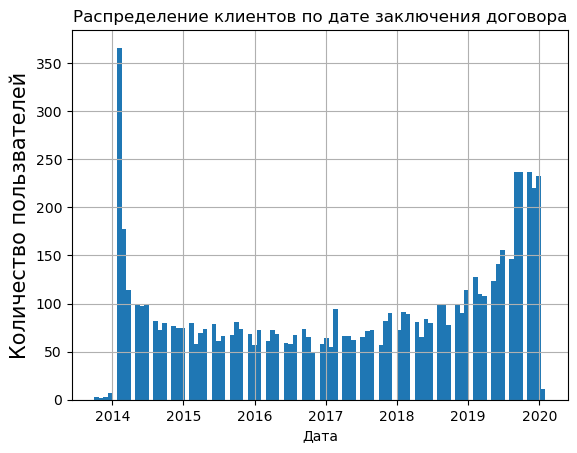

In [10]:
contract['BeginDate'].hist(bins=100)
plt.title('Распределение клиентов по дате заключения договора')
plt.ylabel('Количество пользвателей',size=15)
plt.xlabel('Дата')
plt.show()

Большинство пользователей пришло в 2014 году, вероятно когда компания открылась. Так же количество пользователей растёт с 2018 года.

<div class='alert alert-success'> 👍

###  EndDate

Выведим целевой признак из EndDate

In [11]:
contract["has_client_left"] = contract.apply(lambda row: 0 if row["EndDate"] == 'No' else 1, axis=1)

In [12]:
contract['has_client_left'].describe()

count    7043.000000
mean        0.265370
std         0.441561
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: has_client_left, dtype: float64

За всё время ушло 26.5% пользователей. Значит каждый 4 пользователь уходит.

Добавим признак lifetime чтобы определить количество месяцев прошедших с момента заключения догвора до его окончания (если есть). Для этого в первую очередь нам нужно заменить 'No' в столбце EndDate на последнюю дату в таблице 2020-02-01.

<div class='alert alert-success'> 👍

<div class="alert alert-block alert-info">
<b>Изменения:</b> Сразу добавил lifetime
</div>

<div class='alert alert-success'> 👍 вер 2

In [13]:
contract['EndDate'] = pd.to_datetime(contract['EndDate']
                                     .replace('No','2020-02-01'),
                                     format = '%Y-%m-%d')
contract['lifetime'] = (contract['EndDate'] - contract['BeginDate']).dt.days

to_uint(contract,'lifetime')

contract['lifetime']

0         31
1       1036
2         61
3       1371
4         61
        ... 
7038     730
7039    2191
7040     337
7041     123
7042    2010
Name: lifetime, Length: 7043, dtype: uint16

Готово! Это может быть достаточно весомым признаком для обучения модели. А признаки 'BegindDate' и 'EndDate' я удалю после исследовательского анализа.

In [14]:
lifetime = contract.groupby('lifetime')['has_client_left'].agg(['count','mean'])

In [15]:
lifetime[lifetime['count']>10]['mean'].rolling(12).mean().plot()
plt.title('Скользящаяя средняя доли оттока по lifetime клиента.')
plt.ylabel('Доля оттока')
plt.xlabel('Life Time в днях.')
plt.show()

<div class='alert alert-success'> 👍 вер 2
Очень классный график получился! 

На графике видно, что отток уменьшается по мере увелечения срока жизни клиента. Причём у новых клиентов, которые заключили контракт менее года, отток достигает 60% и более. Это говорит о том, что этот признак важен для обучения модели.

Отток клиентов, с lifetime больше 5 лет не превышает 5%.

### TotalCharges

In [16]:
to_float(contract,'TotalCharges')
to_float(contract,'MonthlyCharges')
to_uint(contract,'has_client_left')

In [17]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float32       
 7   TotalCharges      7032 non-null   float32       
 8   has_client_left   7043 non-null   uint8         
 9   lifetime          7043 non-null   uint16        
dtypes: datetime64[ns](2), float32(2), object(4), uint16(1), uint8(1)
memory usage: 405.9+ KB


In [18]:
contract[contract['TotalCharges'].isna()==True]

customerID  BeginDate    EndDate      Type PaperlessBilling  \
488   4472-LVYGI 2020-02-01 2020-02-01  Two year              Yes   
753   3115-CZMZD 2020-02-01 2020-02-01  Two year               No   
936   5709-LVOEQ 2020-02-01 2020-02-01  Two year               No   
1082  4367-NUYAO 2020-02-01 2020-02-01  Two year               No   
1340  1371-DWPAZ 2020-02-01 2020-02-01  Two year               No   
3331  7644-OMVMY 2020-02-01 2020-02-01  Two year               No   
3826  3213-VVOLG 2020-02-01 2020-02-01  Two year               No   
4380  2520-SGTTA 2020-02-01 2020-02-01  Two year               No   
5218  2923-ARZLG 2020-02-01 2020-02-01  One year              Yes   
6670  4075-WKNIU 2020-02-01 2020-02-01  Two year               No   
6754  2775-SEFEE 2020-02-01 2020-02-01  Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges  \
488   Bank transfer (automatic)       52.549999           NaN   
753                Mailed check       20.250000           NaN   
936                Mailed check       80.849998           NaN   
1082               Mailed check       25.750000           NaN   
1340    Credit card (automatic)       56.049999           NaN   
3331               Mailed check       19.850000           NaN   
3826               Mailed check       25.350000           NaN   
4380               Mailed check       20.000000           NaN   
5218               Mailed check       19.700001           NaN   
6670               Mailed check       73.349998           NaN   
6754  Bank transfer (automatic)       61.900002           NaN   

      has_client_left  lifetime  
488                 0         0  
753                 0         0  
936                 0         0  
1082                0         0  
1340                0         0  
3331                0         0  
3826                0         0  
4380                0         0  
5218                0         0  
6670                0         0  
6754                0         0

In [19]:
all(contract[contract['BeginDate']=='2020-01-01']['MonthlyCharges'] 
    == contract[contract['BeginDate']=='2020-01-01']['TotalCharges'])

True

Появились пропуски, но это связано с тем, что  это новые пользователи, которые только заключили договор и ещё не проводили оплату, поэтому можно заменить пропуски на 0.

In [20]:
contract['TotalCharges'] = contract['TotalCharges'].fillna(0)

<div class='alert alert-warning'> ⚠️
Также даный признак можно заполнить исходя из ежемесячных трат и времени жизни клиента в компании 

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Это новые клиенты и lifetime только у них равен 0, так же я посмотрел, что у тех клиентов которые пришли месяц назад (2020-01-01) MonthlyCharges = TotalCharges, что говорит о том, что расходы за месяц не учитываются в начале месяца. И по этому я думаю, что справедливо оставить здесь 0 значение. Тем более что такое малое количество строк врятли сильно скажется на обучении моделей. А если и скажется, то будет интересно это изучить. ))
</div>

<div class='alert alert-success'> 👍 вер 2
Ок, согласен 

In [21]:
contract['TotalCharges'].describe()

count    7043.000000
mean     2279.732178
std      2266.794434
min         0.000000
25%       398.549988
50%      1394.550049
75%      3786.599976
max      8684.799805
Name: TotalCharges, dtype: float64

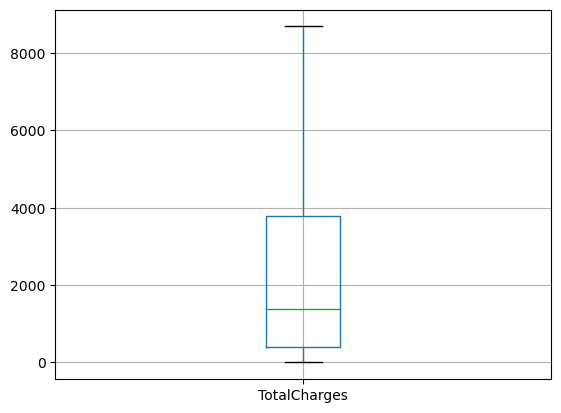

In [22]:
contract.boxplot('TotalCharges')
plt.show()

Боксплот показывает что выбросы отсуствуют. Суммарная оплата ('TotalCharges') имеет показатели от 0 до 8685. Медиана - 1394, среднее 2279. Среднее сильно отличается от медианы в большую сторону, это может говорить о том что есть некоторые клиенты, которые давно пользуются услугами и/или имеют высокую ежемесечную оплату.

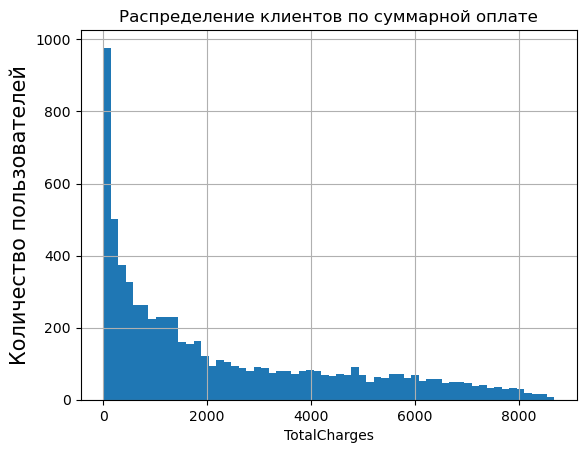

In [23]:
contract['TotalCharges'].hist(bins=60)
plt.title('Распределение клиентов по суммарной оплате')
plt.ylabel('Количество пользователей',size=15)
plt.xlabel('TotalCharges')
plt.show()

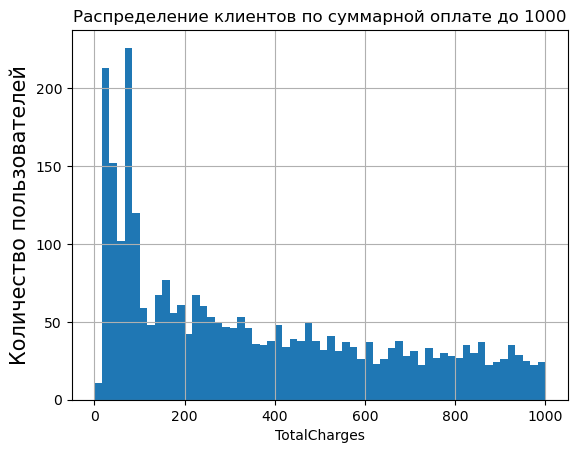

In [24]:
contract['TotalCharges'][contract['TotalCharges']<1000].hist(bins=60)
plt.title('Распределение клиентов по суммарной оплате до 1000')
plt.ylabel('Количество пользователей',size=15)
plt.xlabel('TotalCharges')
plt.show()

Как видно на графике, много клиентов имееют низкую суммарную оплату до 100, что может говорить о том что компанию покидают новые пользователи.

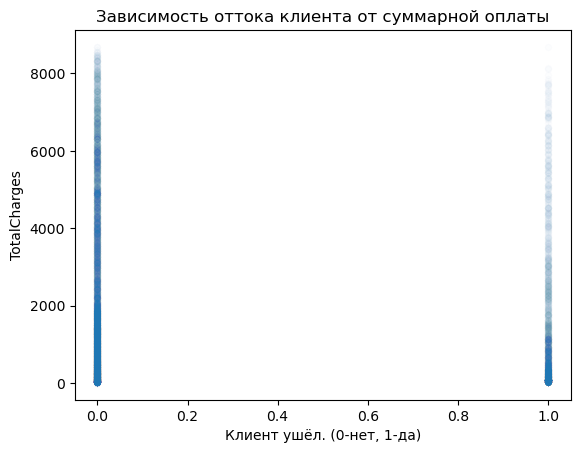

In [25]:
contract[['TotalCharges','has_client_left']].plot(y='TotalCharges',
                                                  x='has_client_left',
                                                  kind='scatter',
                                                  alpha=0.01)
plt.title('Зависимость оттока клиента от суммарной оплаты')
plt.xlabel('Клиент ушёл. (0-нет, 1-да)')
plt.show()

 Отток касается клиентов всех категорий: как новеньких так и постоянных клиентов. Но стоит отметить, что чем дольше клиент пользуется услугами связи, тем меньше шансов, что он уйдёт. Как видно по графику выше, максимальная плотность уходящих клинтов находится при 'TotalCharges' меньше 1000, дальше чем больше 'TotalCharges', тем меньше уходящих пользователей.

Посмотрим на распделение ушедших и оставшихся клиентов.

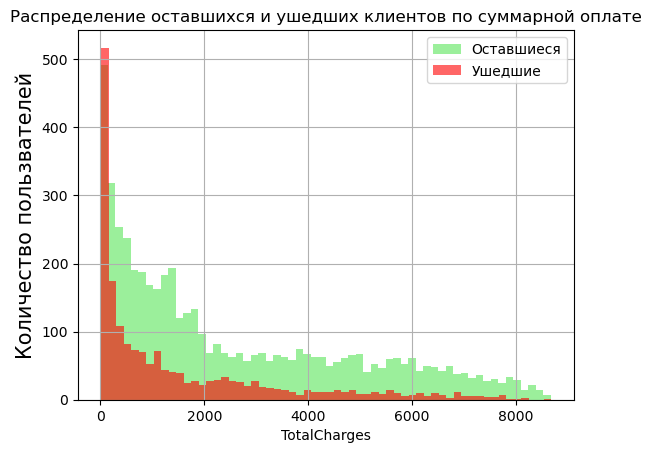

In [26]:
contract['TotalCharges'][contract['has_client_left']==0].hist(bins=60,color='lightgreen',alpha=0.9)
contract['TotalCharges'][contract['has_client_left']==1].hist(bins=60,color='r',alpha=0.6)
plt.title('Распределение оставшихся и ушедших клиентов по суммарной оплате')
plt.ylabel('Количество пользователей',size=15)
plt.xlabel('TotalCharges')
plt.legend(['Оставшиеся','Ушедшие'])
plt.show()

Как видно расределение уходящих пользователей намного сильнее сдвинуто к 0. А оставшиеся пользватели распределены по показателю TotalCharges от 2000 до 600 достаточно равномерно.

In [27]:
TotalCharges = []
mean_tc = []
for _ in range(8000,0,-100):
    TotalCharges.append(_)
    mean_tc.append(contract['has_client_left'][contract['TotalCharges']<_].mean())
    t = pd.DataFrame({'mean':mean_tc}, index=TotalCharges).sort_index()
    
TotalCharges = []
mean_tc = []
for _ in range(100,8001,100):
    TotalCharges.append(_)
    mean_tc.append(contract['has_client_left'][contract['TotalCharges']>_].mean())
    t1 = pd.DataFrame({'mean':mean_tc},index=TotalCharges)
    
tt = pd.merge(t, t1, left_index=True, right_index=True)
# tt['mean'] = (tt['mean_x']+tt['mean_y'])/2

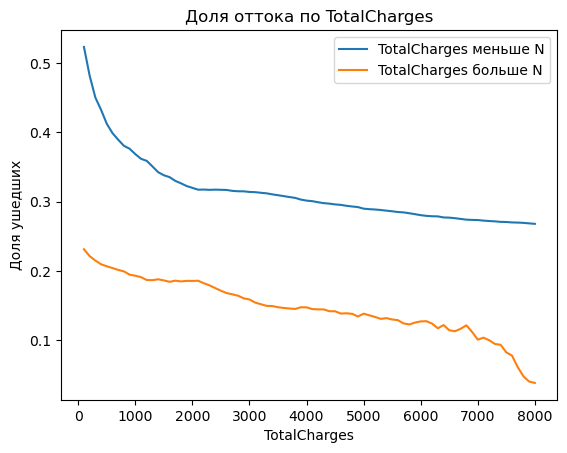

In [28]:
tt.plot()
plt.title('Доля оттока по TotalCharges')
plt.ylabel('Доля ушедших')
plt.xlabel('TotalCharges')
plt.legend(['TotalCharges меньше N','TotalCharges больше N'])
plt.show()

<div class="alert alert-block alert-info">
<b>Изменение:</b> ниже добавил среднюю по квантилям. И прибавил исследовательского анализа.
</div>

<div class='alert alert-success'> 👍 вер 2

In [29]:
t = contract.copy()
t['TotalCharges_q'] = pd.qcut(t['TotalCharges'],12)
t.groupby('TotalCharges_q')['has_client_left'].agg(['mean']).plot(rot=45)
plt.title('Доля оттока по квантилям TotalCharges')
plt.ylabel('Доля ушедших')
plt.xlabel('TotalCharges квантили')
plt.legend(['TotalCharges'])
plt.show()

Доля уходящих пользователей падает по мере отдаления от 0, больше половины новеньких клиентов с TotalCharges меньше 200 прекратило пользоваться услугами связи. Значит life time этих клиентов будет в среднем 3 месяца.

Видно, что чем дольше человек пользуется услугами связи и чем больше у него 'TotalCharges', тем меньше вероятность, что он покинет компанию. Клиенты которым нравится пользоваться услугами компании не будут покидать её без везкой причины (к примеру переезд) или смотреть в сторону других оператров. А вот новенькие пользователи, надежды которых не оправдались наоборот прекращают пользоваться услугами связи.

Соеденяю таблицы для удобства работы.

### MonthlyCharges

In [30]:
contract['MonthlyCharges'].describe()

count    7043.000000
mean       64.761826
std        30.089973
min        18.250000
25%        35.500000
50%        70.349998
75%        89.849998
max       118.750000
Name: MonthlyCharges, dtype: float64

Средняя ежемесечная оплата - 65. Медийная - 70. Минимальная 18.25, максимальная - 118.75.

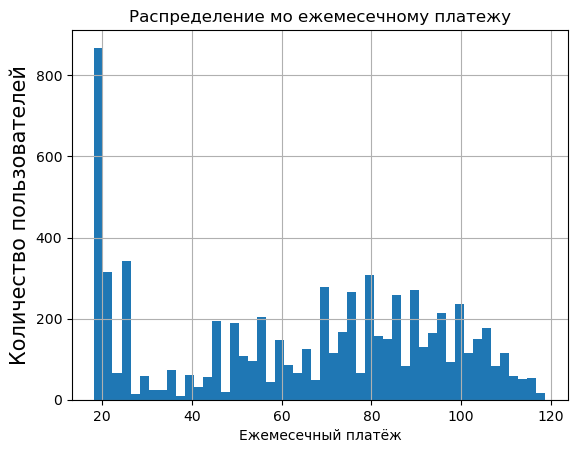

In [31]:
contract['MonthlyCharges'].hist(bins=50)
plt.title('Распределение мо ежемесечному платежу')
plt.ylabel('Количество пользователей',size=15)
plt.xlabel('Ежемесечный платёж')
plt.show()

In [32]:
round(contract[contract['MonthlyCharges']<=25]['MonthlyCharges'].count()/len(contract),4)

0.1996

20% клиентов имеют ежемесячный платёж меньше 25. Теперь посмотрим на зависимость оттока от ежемесячного платежа.

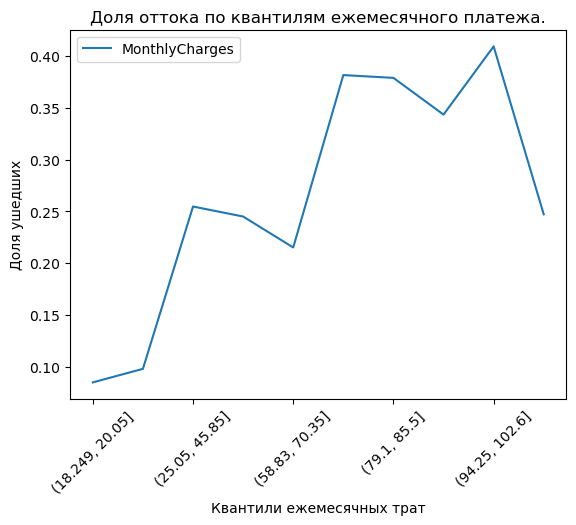

In [33]:
t = contract.copy()
t['MonthlyCharges_q'] = pd.qcut(t['MonthlyCharges'],10)
t.groupby('MonthlyCharges_q')['has_client_left'].agg(['mean']).plot(rot=45)
plt.title('Доля оттока по квантилям ежемесячного платежа.')
plt.ylabel('Доля ушедших')
plt.xlabel('Квантили ежемесячных трат')
plt.legend(['MonthlyCharges'])
plt.show()

А вот с ежемесячными расходами другая картина. Те кто имеют низкий ежемесячный платёж уходят реже клиентов с более высокими тратами. Так же клиенты с самимы большими ежемесячными расходами (больше 102) наоборот иду на уменьшее оттока. Посмотрим на зависимость ежемесячного платежа от lifetime клиента.

In [34]:
t.groupby('MonthlyCharges_q')['lifetime'].agg(['mean','median']).plot(rot=45)
plt.title('Зависимость срока жизни клиента от ежемесячного платежа.')
plt.ylabel('Средний Life Time')
plt.xlabel('Квантили ежемесячного платежа.')
plt.legend(['Средний Life Time по квантилям.','Медийный Life Time'])
plt.show()

А здесь уже картина немного протеворечит предыдущим наблюдениям. Те у кого высокий ежемесячный платёж - больше 85 в среднем имеют более высокий life time.

### Type

In [35]:
contract['Type'].hist()
plt.title('Распределение по типу оплаты.')
plt.ylabel('Количество пользователей',size=15)
plt.xlabel('Тип оплаты.')
plt.show()

<div class='alert alert-warning'> ⚠️ вер 2

У тебя получились хорошие, информативные графики, но они весьма однотипные. А значит отрисовку можно автоматизировать в цикле или хотя бы обернуть с помощью функции, чтобы сократить число строк кода

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Согласен, верное замечание. Тогда я не буду убирать те графики что уже есть, а для новых столбцов, которые появятся в обьеденённой таблице сделаю цикл, который распечатает bar'ы, тем более что все остальные колонки для этого хорошо подходят и большинство из них содержит всего три варианта (1,0,-1 = 'да','нет','не пользуется этим видом услуг')
</div>

Большинство пользователей выбирает ежемесечную оплату.

In [36]:
def groupby_left(df,column,agg):
    """Функция берёт на вход датафрейм, название столбца и название функций.
    По ним будет производиться группировка по столбцу с оттоком клиентов."""
    return df.groupby(column)['has_client_left'].agg(agg)

In [37]:
groupby_left(contract,'Type',['count','mean'])

count      mean
Type                           
Month-to-month   3875  0.427097
One year         1473  0.112695
Two year         1695  0.028319

Больше всего отток у клиентов с ежемесечной оплатой - 42.7%, у клиентов с ежегодной оплатой отток - 11%, а у клиентов в платежом раз в два года всего 2.8%. Это важный признак для определения оттока. И опять же он указывает на то, что отток происходит в основном среди новых клиентов.

### PaperlessBilling

In [38]:
contract['PaperlessBilling'] = contract['PaperlessBilling'].isin(['Yes'])*1
to_uint(contract,'PaperlessBilling')
groupby_left(contract,'PaperlessBilling',['count','mean'])

count      mean
PaperlessBilling                 
0                  2872  0.163301
1                  4171  0.335651

Большая часть клиентов использует безналичный расчёт, но отток среди них вдвое больше (33,5% против 16,3% у тех кто расплачивается наличными).

### PaymentMethod

In [39]:
groupby_left(contract,'PaymentMethod',['count','mean'])

count      mean
PaymentMethod                             
Bank transfer (automatic)   1544  0.167098
Credit card (automatic)     1522  0.152431
Electronic check            2365  0.452854
Mailed check                1612  0.191067

Способ оплаты так же играет роль. Те кто пользуются электронным чеком обладаю большим оттоком в 45.2% против 15-19%. Так же их больше чем в других категориях. (2365 против 1522-1612).

## Обьединение таблиц

Мы рассмотрели первую таблицу с данными об договорах клиентов. Теперь можно обьеденить её с другими таблицами, в которых хранятся данные об клиентах и услугах телефоннии и интернета. Так будет удобно анализировать признаки по их влиянию на целевой признак.

Во всех таблицах переведу Yes и No в формат 1-0, это сэкономит большое количество места и увеличит скорость обработки данных моделями.

In [40]:
personal[['Partner', 'Dependents']] = personal[['Partner', 'Dependents']].isin(['Yes'])*1
for i in personal.columns[2:]: to_uint(personal,i)
    
phone['MultipleLines'] = phone['MultipleLines'].isin(['Yes'])*1
to_uint(phone,'MultipleLines')

columns = ['OnlineSecurity', 'OnlineBackup', 
          'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies']
internet[columns] = (internet[columns]).isin(['Yes'])*1
for i in internet.columns[2:]: to_uint(internet,i)

In [42]:
df = contract.merge(personal, how='left').merge(phone, how='left').merge(internet, how='left')

<div class='alert alert-warning'> ⚠️
Не забудь убедиться что данные не потеряны, очень частое явление, когда во время объединения теряются данные 

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Правильно проверяю? Сравниваю сколько было строк-столбцов в прошлых таблицах и сколько стало.
    
Пробовал создать цикл, который это будет всё делать, но не получилось и к тому же это как-то слишком сложно для такой простой задачи. )
</div>

<div class='alert alert-success'> 👍 вер 2
Да, все верно

In [43]:
df.shape

(7043, 22)

Количество строк и столбцов корректное.

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   uint8         
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float32       
 7   TotalCharges      7043 non-null   float32       
 8   has_client_left   7043 non-null   uint8         
 9   lifetime          7043 non-null   uint16        
 10  gender            7043 non-null   object        
 11  SeniorCitizen     7043 non-null   uint8         
 12  Partner           7043 non-null   uint8         
 13  Dependents        7043 non-null   uint8         
 14  MultipleLines     6361 n

Количество строк во всех стобцах соотвествует количеству строк, которое было до слияния. Значит данные перенеслись верно.

In [45]:
df.sample(5).T

1176                     2818  \
customerID                     3992-YWPKO               4831-EOBFE   
BeginDate             2019-05-01 00:00:00      2017-05-01 00:00:00   
EndDate               2019-11-01 00:00:00      2019-10-01 00:00:00   
Type                       Month-to-month           Month-to-month   
PaperlessBilling                        1                        0   
PaymentMethod     Credit card (automatic)  Credit card (automatic)   
MonthlyCharges                 109.900002                94.650002   
TotalCharges                   669.450012              2649.149902   
has_client_left                         1                        1   
lifetime                              184                      883   
gender                             Female                     Male   
SeniorCitizen                           0                        0   
Partner                                 0                        1   
Dependents                              0                        1   
MultipleLines                         1.0                      0.0   
InternetService               Fiber optic              Fiber optic   
OnlineSecurity                        0.0                      1.0   
OnlineBackup                          1.0                      0.0   
DeviceProtection                      1.0                      0.0   
TechSupport                           1.0                      0.0   
StreamingTV                           1.0                      1.0   
StreamingMovies                       1.0                      1.0   

                                 1251                 4731  \
customerID                 7595-EUIVN           8748-HFWBO   
BeginDate         2019-10-01 00:00:00  2018-07-01 00:00:00   
EndDate           2019-11-01 00:00:00  2020-02-01 00:00:00   
Type                   Month-to-month             One year   
PaperlessBilling                    0                    0   
PaymentMethod        Electronic check         Mailed check   
MonthlyCharges              75.800003                 19.9   
TotalCharges                75.800003           357.700012   
has_client_left                     1                    0   
lifetime                           31                  580   
gender                         Female                 Male   
SeniorCitizen                       0                    0   
Partner                             0                    1   
Dependents                          0                    1   
MultipleLines                     0.0                  0.0   
InternetService           Fiber optic                  NaN   
OnlineSecurity                    0.0                  NaN   
OnlineBackup                      1.0                  NaN   
DeviceProtection                  0.0                  NaN   
TechSupport                       0.0                  NaN   
StreamingTV                       0.0                  NaN   
StreamingMovies                   0.0                  NaN   

                                 4963  
customerID                 8313-AFGBW  
BeginDate         2016-03-01 00:00:00  
EndDate           2020-02-01 00:00:00  
Type                         Two year  
PaperlessBilling                    0  
PaymentMethod        Electronic check  
MonthlyCharges              73.599998  
TotalCharges              3522.649902  
has_client_left                     0  
lifetime                         1432  
gender                           Male  
SeniorCitizen                       0  
Partner                             1  
Dependents                          0  
MultipleLines                     0.0  
InternetService                   DSL  
OnlineSecurity                    0.0  
OnlineBackup                      1.0  
DeviceProtection                  1.0  
TechSupport                       0.0  
StreamingTV                       1.0  
StreamingMovies                   1.0

Заполню пропуски значением -1, чтобы показать, что клиент не пользуется этим видом связи.

In [46]:
df = df.fillna(-1)
columns.append('MultipleLines')
for i in columns: to_int(df,i)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   uint8         
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float32       
 7   TotalCharges      7043 non-null   float32       
 8   has_client_left   7043 non-null   uint8         
 9   lifetime          7043 non-null   uint16        
 10  gender            7043 non-null   object        
 11  SeniorCitizen     7043 non-null   uint8         
 12  Partner           7043 non-null   uint8         
 13  Dependents        7043 non-null   uint8         
 14  MultipleLines     7043 n

<div class='alert alert-warning'> ⚠️ вер 2
Не хватает итогового вывода по предобработке. Напиши тут, что и как было предобработано в кратце.

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> обязательно! Я добавлю его ниже после графиков и исследовательского анализа.
</div>

<div class="alert alert-block alert-info">
<b>Изменение:</b> доделал EDA, добавил графики распределения, оттока, корреляции и выводы.
</div>

## Графики распределения

Создаю графики столбчатой диаграммы по всем стобцам начиная с Type

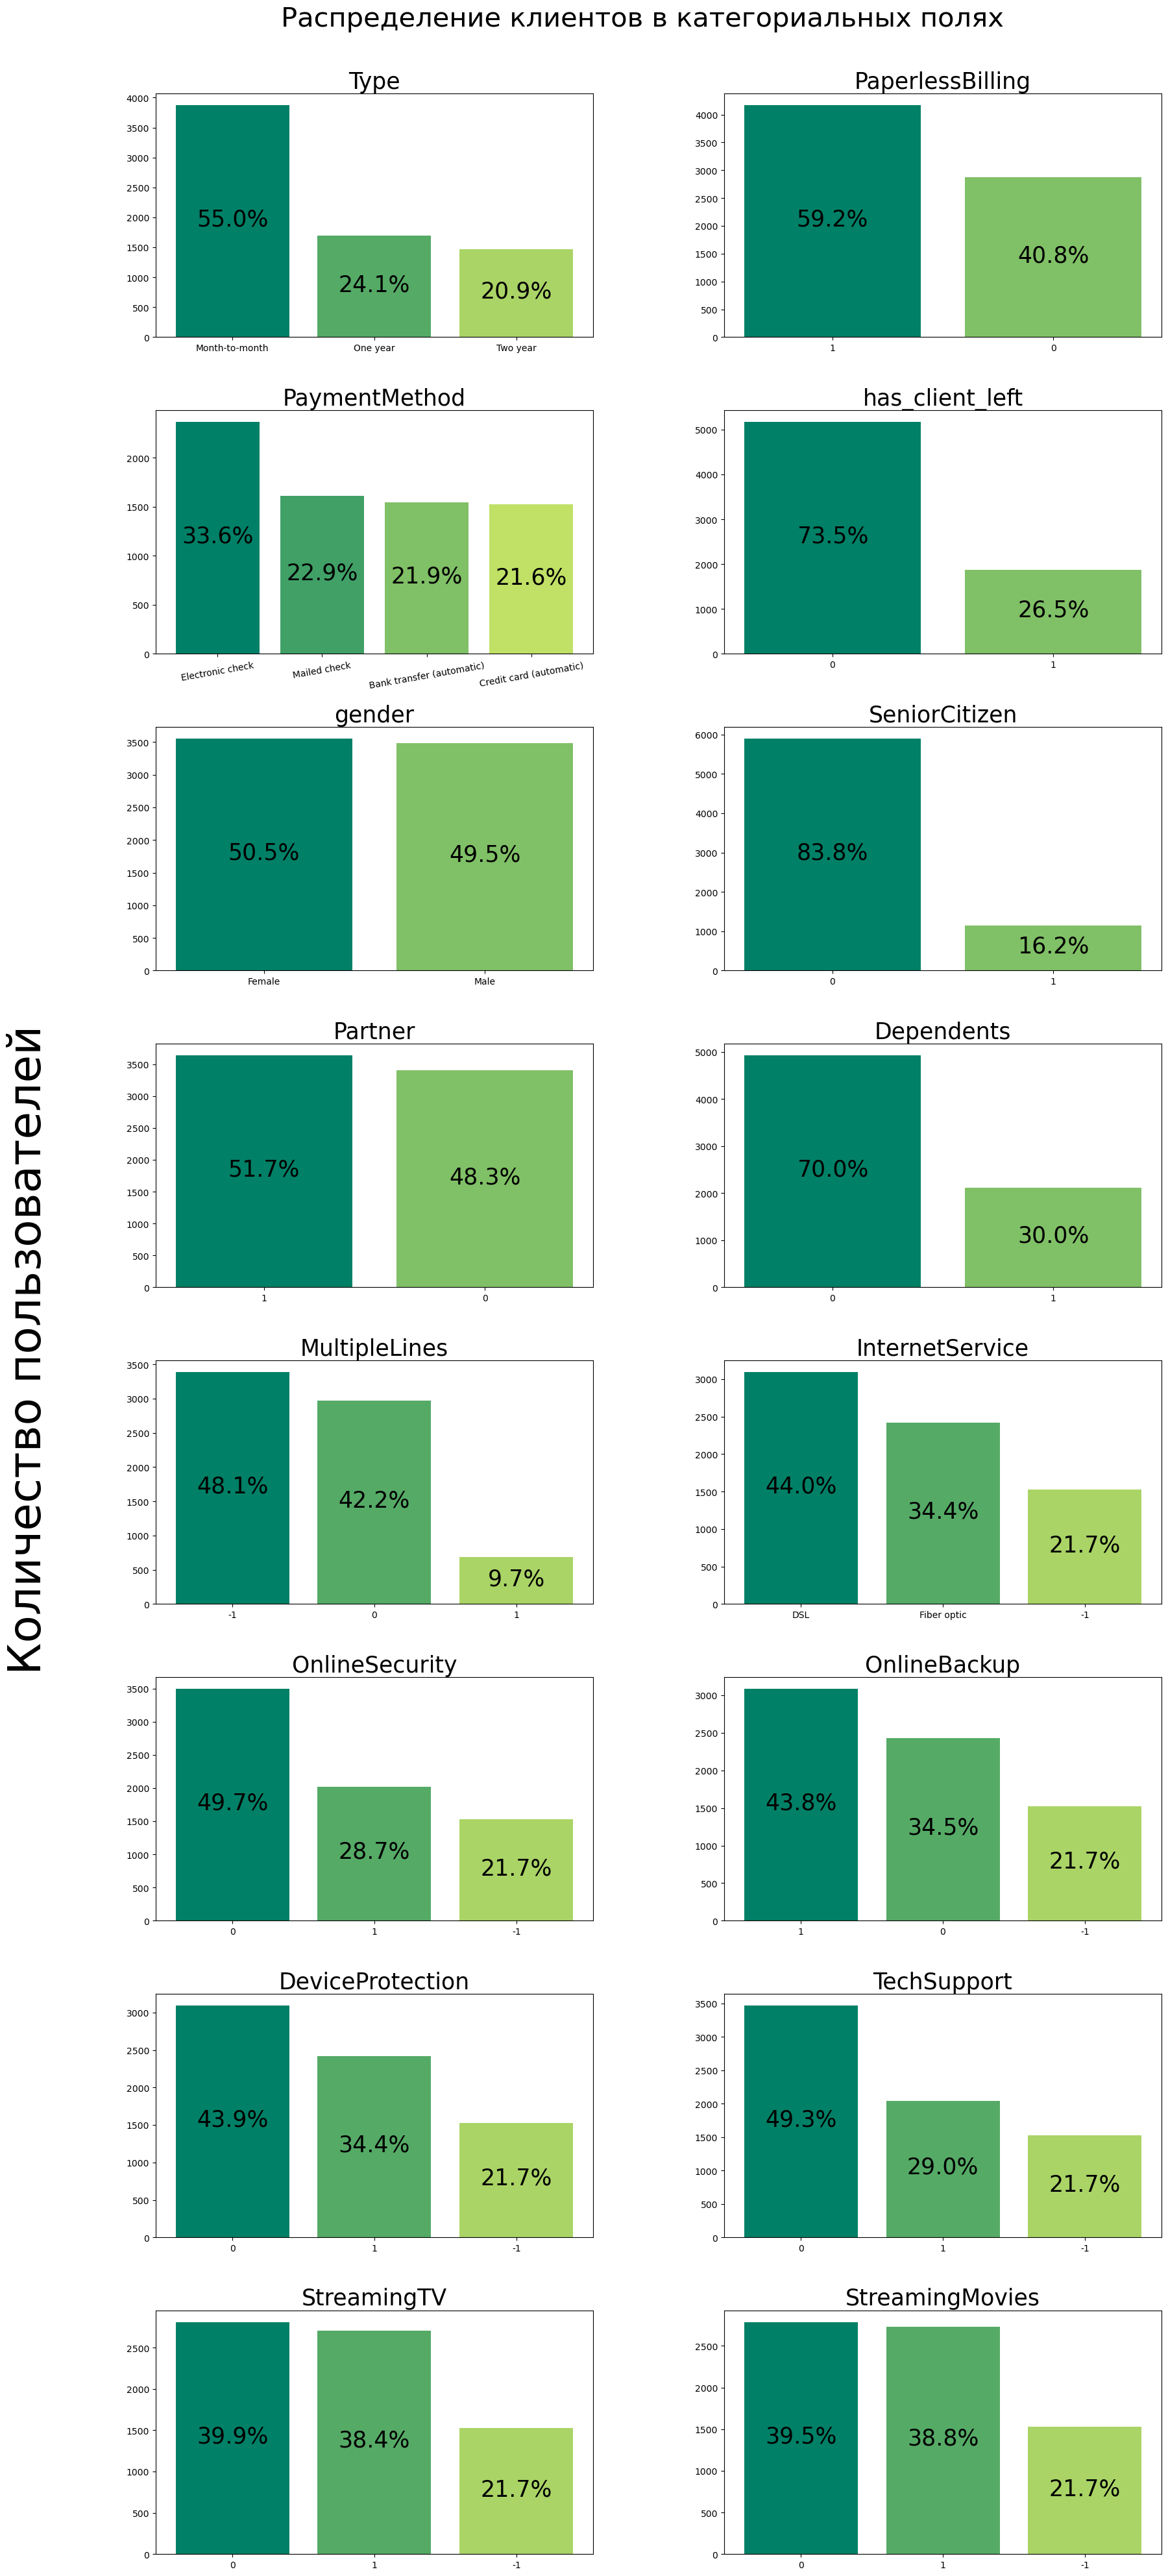

In [48]:
columns_bar = ['Type', 'PaperlessBilling', 'PaymentMethod', 'has_client_left',
               'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
               'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
               'TechSupport', 'StreamingTV', 'StreamingMovies']

palette = plt.cm.summer
fig = plt.figure()
plot_num = 1
fig.text(0.01, 0.75, 'Количество пользователей', va='center', rotation='vertical', size=50) 

# цикл по столбцам
for col in columns_bar:
    ax = fig.add_subplot(len(columns_bar), 2, plot_num)
    ax.bar(df[col].map(str).unique(), df[col].value_counts())
    ax.set_title(col,size=25)
 #   ax.set_ylabel('Количество пользователей',size=18) # если нужно будет добавить подпись оси y на каждый график
    plot_num += 1
    
    if col == 'PaymentMethod':
        x_tick_locations = np.arange(len(df[col].map(str).unique()))
        ax.set_xticks(x_tick_locations)
        ax.set_xticklabels(df[col].map(str).unique(), rotation=10)
        
    counts = df[col].value_counts()
    x = np.arange(len(counts))
    
    # цикл по барам
    for i, count in enumerate(counts):
        
        # вычисляем процентное соотношение для каждого бара
        percent = count / df[col].count() * 100
        
        # добавляем подпись с процентами
        ax.annotate('{:.1f}%'.format(percent), xy=(x[i], count/2), 
                    xytext=(0, -10), textcoords='offset points',
                    ha='center', va='bottom', fontsize=25)
        
        # добавляем цвет
        color = palette(i / len(counts))
        ax.bar(x[i], count, color=color)

               
fig.set_size_inches(20, 90)
fig.suptitle('Распределение клиентов в категориальных полях', fontsize=30)
fig.subplots_adjust(top=0.965,hspace=0.3,wspace=0.3)
plt.show()

### **Вывод по графикам распределения**

Создаю функцию которая упростит описание выводов.

In [49]:
def eda_markdown(columns,text):

    for column in columns:
        markdown_string = text.format(column)
        
        print(markdown_string)

```python

text ="""
**{}:**
- Распределение:
"""
eda_markdown(df.columns[10:],text)
```

**gender:**
- Распределение: мужчин и женщин поровну.


**SeniorCitizen:**
- Распределение: 16.2% являються пенсионерами.


**Partner:**
- Распределение: 51.7% с партнёром, 48.3% - без.


**Dependents:**
- Распределение: 70% без иждевенцев, 30% - с.


**MultipleLines:**
- Распределение: 48.1% не пользуються этим видом связи. Только у 9.7% от всей выборки есть возможость использовать параллельное соединение во время звонка (это около 20% из тех, кто пользуються телефонной связью).


**InternetService:**
- Распределение: DSL у 44% пользователей, у 34.4 - fiber optic, 21.7% людей не пользуются интернет услугами.


**OnlineSecurity:**
- Распределение: 49.7% из всего датасета не используют интернет защиту, 28.7% - пользуются.  21.7% людей не пользуются интернет услугами.


**OnlineBackup:**
- Распределение: 34.5% испольуют онлайн хранищие, 43.8% не пользуються. 21.7% людей не пользуются интернет услугами.


**DeviceProtection:**
- Распределение: Защитой устройства пользуются 43.9% клиентов из выборки, не пользуются - 34.4%.  21.7% людей не пользуются интернет услугами.


**TechSupport:**
- Распределение: Выделнной линией тех.поддержки пользуются 49.3% клиентов, 29% - не пользуются.  21.7% людей не пользуются интернет услугами.


**StreamingTV:**
- Распределение: Поровну среди тех кто пользуется услугами.  21.7% людей не пользуются интернет услугами.


**StreamingMovies:**
- Распределение: Поровну среди тех кто пользуется услугами.  21.7% людей  не пользуются интернет услугами.

## Графики зависимости оттока

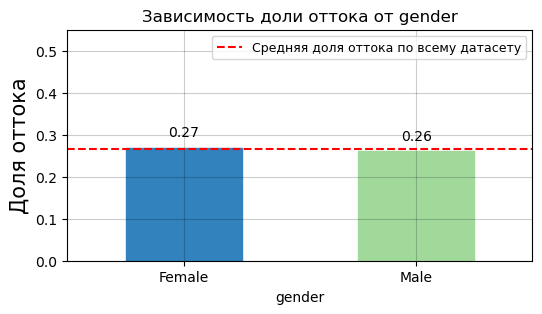

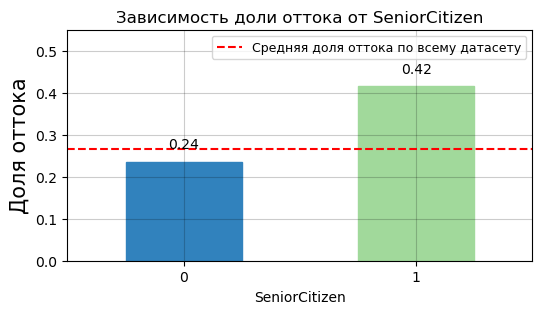

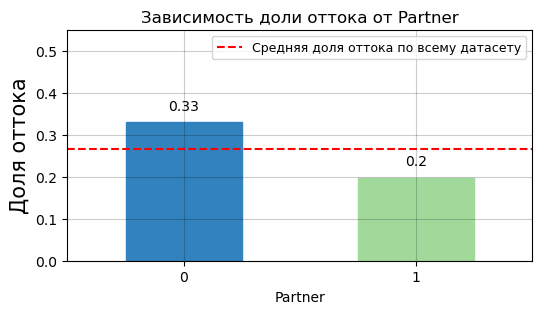

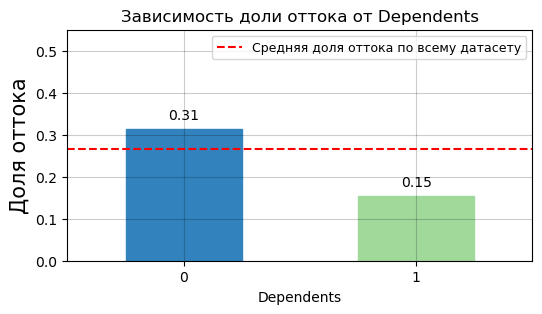

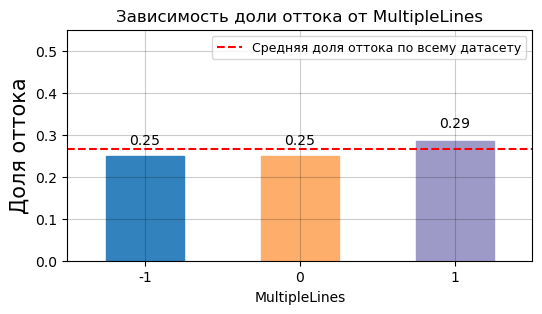

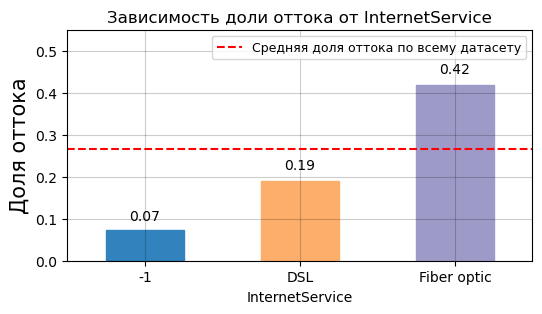

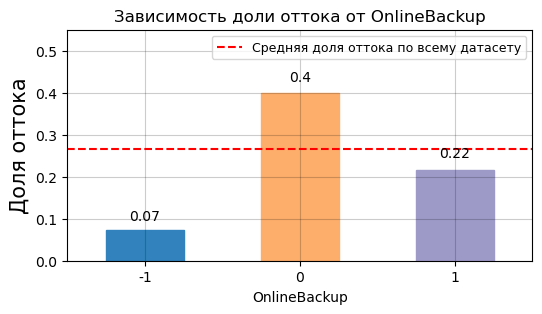

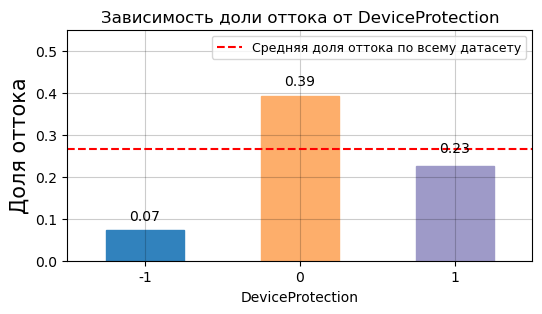

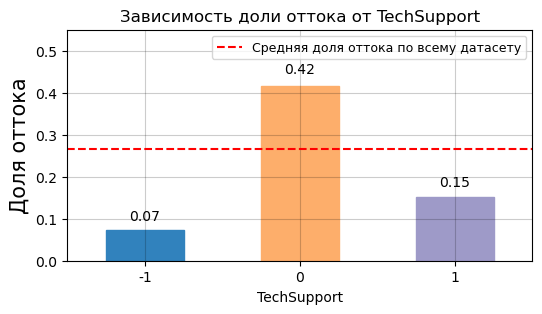

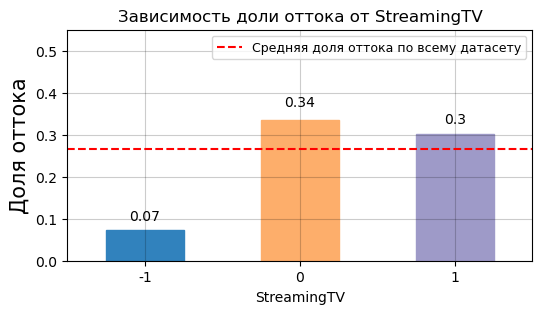

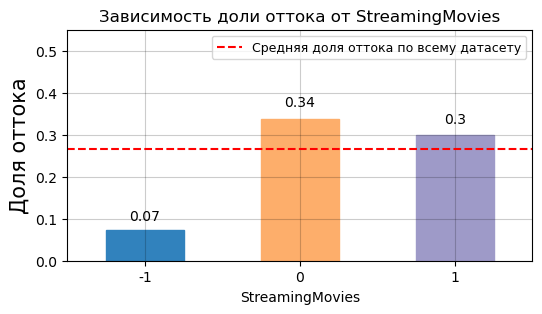

In [50]:
cmap = cm.get_cmap('tab20c')

for column in columns_bar[4:]:
    plot = groupby_left(df,column,['mean']).plot(kind='bar',cmap='summer',
                                          figsize=(6,3),rot=0,grid=True,legend=False)
    plt.title(f'Зависимость доли оттока от {column}')
    plt.ylabel('Доля оттока',size = 15)
    plt.axhline(y=round(df['has_client_left'].mean(),5),
                color='red', linestyle='--', 
                label='средняя доля оттока ')
    
    means = round(groupby_left(df,column,['mean']).loc[:, 'mean'],2)
    
    for i, bar in enumerate(plot.get_children()[:len(means)]):
        bar.set_color(cmap(i / len(means)))
    
    for x, y, label in zip(range(len(means)), means, means):
        plt.text(x, y+0.02, label, ha='center', va='bottom')
    plt.ylim(0,0.55)
    plt.grid(color='black',alpha=0.2)
    plt.legend(['Cредняя доля оттока по всему датасету'],fontsize=9)
    plt.show()

### **Вывод по графикам оттока**

``` python
text ="""
**{}:**
- Отток:
"""
eda_markdown(df.columns[10:],text)
```

**gender:**
- Отток: Не зависит от пола.


**SeniorCitizen:**
- Отток: среди пенсионеров намного выше - 42% против 24%.


**Partner:**
- Отток: больше у людей без партнера - 33% против 20%.


**Dependents:**
- Отток: вдвое больше у людей без иждевенцев - 31% против 15%


**MultipleLines:**
- Отток: у тех у кого есть эта функция незначительно больше - 29% против 25%.

**Ниже идут интернет услуги. Стоит отметить, что доля оттока у тех, кто не пользуется интернет услугами намного меньше средней и состаляет всего 7%**

**InternetService:**
- Отток: сильнее более чем в 2 раза у тех у кого оптоволоконный кабель (Fiber optic) - 42% против 19% у владельцев DSL («цифровая абонентская линия»).


**OnlineSecurity:**
- Отток: почти в трое больше у тех, кто не пользуется защитой 42% против 15%.


**OnlineBackup:**
- Отток: сильно больше (почти в 2 раза) у тех, у кого нет хранилища. 40% против 22%.


**DeviceProtection:**
- Отток: сильно больше у тех, у кого нет защиты устройства - 39% против 23%.


**TechSupport:**
- Отток: почти в трое больше у тех, у кого нет выделенной линия технической поддержки - 42% против 15%.


**StreamingTV:**
- Отток: немного больше у тех, у кого не подключён сервис. 34% против 30%.


**StreamingMovies:**
- Отток: так же как и у "StreamingTV".

## Матрица корреляции.

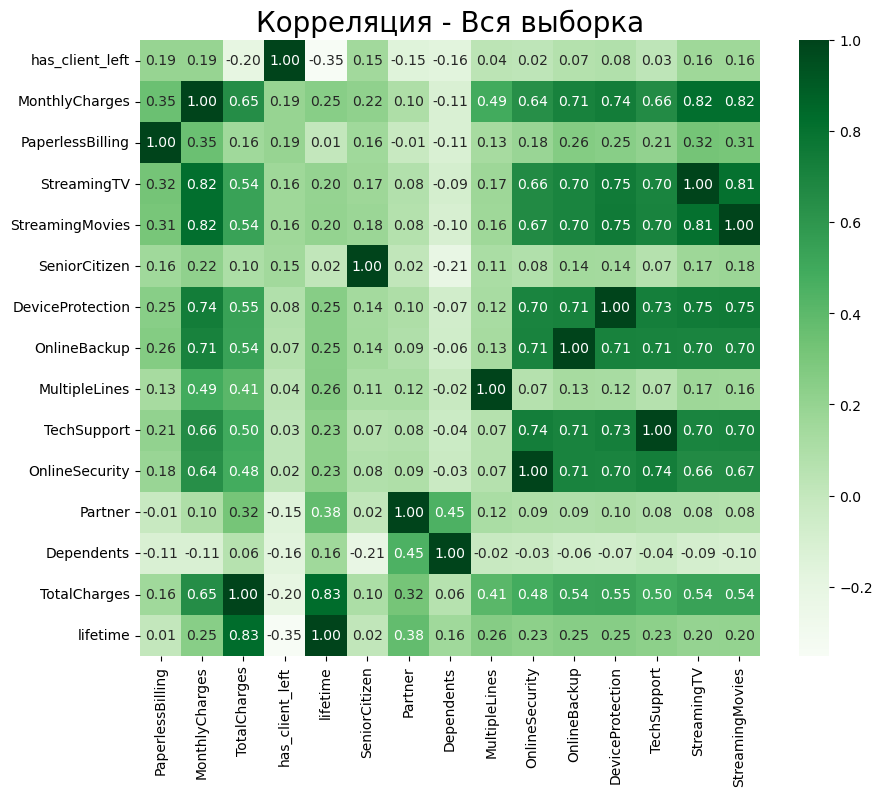

In [51]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr().sort_values(by='has_client_left', ascending=False),
            annot=True, 
            cmap="Greens", 
            fmt='.2f')
plt.title('Корреляция - Вся выборка',size=20)
plt.show()

In [52]:
df[['StreamingTV','StreamingMovies']].value_counts()

StreamingTV  StreamingMovies
 0            0                 2018
 1            1                 1940
-1           -1                 1526
 0            1                  792
 1            0                  767
dtype: int64

**Корреляция с целевым признаком "has_client_left":** корреляция со всеми признаками кроме lifetime от 0.19 до -0.2, то говорит о том, что нет явной линейной зависимости таргета от других признаков, и вероятно линейные модели будут показывать низкую эффективность. Исключение составляет признак lifetime, имеющий слабую обратную корреляцию -0.35 (чем меньше времени клиент пользуется услугами, тем больше вероятности ухода.)

**Корреляция признаков между собой:** большинство признаков имеют умеренную и сильную корреляцию с Ежемесячной оплатой ("MonthlyCharges") и Суммарной оплатой ("TotalCharges"), что ожидаемо, потому что наличие/отсутствие услуг влияет на размер платежа. Имеется сильная корреляция между стриминговым телевидением ("StreamingTV ") и каталогом фильмов ("StreamingMovies") - большинство клиентов предпочитают подключать оба эти сервиса, либо никакой.

## Итоги первичной предобрботки.

На этапе предобработке были выполнены следующие изменения:
  - типы данных был изменены на корректные:
    - столбцы EndDate и BeginDate на datetime
    - TotalCharges из object в float32
  - были добавлены новые столбцы:
    - "has_client_left" содержит целевой признак в формате 1-0 (клиент ушёл: да-нет) был выведен из EndDate
    - "lifetime" - срок жизни клиента в днях.
  - все бинарные данные в формате "Yes"-"No" были переведены в формат 1-0 для экономии памяти и удобства.
  - было проведено соеденение таблиц с сохранением всех данных.
  - пропуски были заполнены значением "-1", что означает, что клиент не пользуется данным видом услуг.
  - все числовые типы данных были переформатированы в минимальные (uint8,int8,float32 и тд.) для экономии памяти и увелечения скорости работы моделей.

## Выводы EDA

1. За всё время ушло 26.5% пользователей. Значит каждый 4 пользователь уходит.
2. В таблице присутствуют данные за 8 лет и 4 месяца.
3. Большинство пользователей пришло в 2014 году, вероятно когда компания открылась. Так же количество пользователей растёт с 2018 года.
4. Отток уменьшается по мере увелечения срока жизни клиента. Причём у новых клиентов, которые заключили контракт менее года, отток достигает 60% и более. А у клиентов с lifetime больше 5 лет не превышает 5%.
5. Тот же вывод подтверждает график суммарной оплаты TotalCharges - чем больеш суммарный платёж клиентов, тем менше доля оттока.
6. Средний ежемесечный платёж - 65. Медиана - 70. Минимальная 18.25, максимальная - 118.75.
7. 20% клиентов имеют ежемесячный платёж меньше 25.
8. Те кто имеют низкий ежемесячный платёж уходят реже клиентов с более высокими тратами.
9. Те у кого высокий ежемесячный платёж (больше 85) в среднем имеют более высокий life time.
10. По виду оплаты: Больше всего отток у клиентов с ежемесечной оплатой - 42.7%, у клиентов с ежегодной оплатой отток - 11%, а у клиентов с платежом раз в два года всего 2.8%. 
11. Способ оплаты так же играет роль. Те кто пользуются электронным чеком обладаю большим оттоком в 45.2% против 15-19%. Так же их больше чем в других категориях. (2365 против 1522-1612).
12. Большая часть клиентов использует безналичный расчёт, но отток среди них вдвое больше (33,5% против 16,3% у тех кто расплачивается наличными).
--- Остальные выводы по распределению и оттоку приведены в пунктах "Выводы по графикам распределения" и "Графики оттока" соотвественно.

13. Имеется очень слабая корреляция целевого признака с lifetime, с остальными признаками корреляция отсутствует. Это говорит о том, что в данных много нелинейных зависимостей.

Портрет потенциального уходящего клиента (summary характеристик с самой большой долей оттока): Пенсионер без партнера и иждивенцев, который подключил интернет через оптоволоконный кабель и не подключил никаких дополнительных услуг, заключил контракт менее года назад , пользуется электронным чеком и безналичным рассчётом, оплата ежемесячная.

Портрет потенциального стабильного клиента (summary характеристик с самой низкой долей оттока): Человек не пенсионного возраста с партнером и иждивенцами, который не подключал интернет (а если и подклюил, то конечно же через DSL и пользуется всеми доп. услугами), заключил контракт более 5 лет назад и имеет низкий ежемесячный платёж, не использует электронный чек и платит наличными. Оплачивает раз в два года.


# Вопросы

UPDATE: на большинство вопросов был дан ответ во время трансляции в среду, но для сохранеия историчности я не буду их пока удалять. )

Так как уже назрело много уточняющих вопросов по имеющимся данным, то я решил их сразу здесь написать. Пока эта часть будет на проверке я продолжу проводить предобработку и исследовательский анализ локально.

1. У нас нет целевого признака, но его можно вывести из EndDate (даты окончания договора). Это правильный подход? Так же странно что EndDate есть только у четырёх последних месяцов, как будто клиенты до этого никогда не уходили.


2. По сути у нас задача бинарной классификации. Но заказчик не уточнил каких показателей он хочет добиться. Я предполагаю, что в данном случае будет правильно использовать метрики F1-score и AUC-Roc?


3. Наша задача сделать предсказание возможен-ли уход клиента в формате 1-0 (да-нет) или нам нужно указать вероятность ухода для каждого клиента? (можно получить по формуле model.predict_proba * 2 - 1)


4. Есть-ли ограничения на максимальное время обучения и предсказание модели? А так же другие ограничения связанные с типом модели и интерпретируемостью результатов.

<div class='alert alert-info'> 🔬

1) Обсудили на встрече, по endDate

2) accuracy, roc-auc

3) Зачем какая-то формула ? Там и так вероятность уже предсказывается с помощью predict_proba

4) ноутбук в тренажере должен отрабатывать за 10 минут

 # План

1. Произвести обзор данных и соеденить таблицы.
    - Выгрузка данных
    - Обзор с помощью pandas_profiling
    - Первые выводы
2. Провести первичную предобработку и  исследовательский анализ данных.
   + Посмотреть на распределения признаков.
   + Посмотреть как целевой признак зависит от остальных.
   + Изучить корреляции признаков с целевым и между собой.
3. Подготовить данные для обучения
  + Удалить лишние признаки
  + Разбить на тестовую и обучающую выборки
  + Подготовить pipeline с кодировщиками и scaler'ами
4. Обучить модели и выбрать лучшую
  - Обучить минимум 3 модели с помощью GridSearchCV
  - Выбрать лучшую по метрике ROC-AUC
5. Протестировать выбранную модель 
  - Достичь показателя ROC-AUC больше 75 (а лучше 88+)
  - Проверить модель на адекватность
  - Вывести график важности признаков

<div class='alert alert-danger'> ⛔️
Твой план должен состоять из 4-5 пунктов которые наиболее обще характеризуют основные этапы работы с данными при построении модели. Твой план должен состоять из универсальных этапов которые применимы к другим данным и моделям бинарной классификации. Внутри каждого из пунктов ты можешь более детально прописать, что именно будет сделано. В твоем плане я ожидаю увидеть 4-5 шагов как например предобработка, иад, моделирование и тд.


<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Если я правильно понял задание, то должно быть как-то так. Но если есть ещё какие-то комментарии я их с радостью приму. ))
</div>

<div class='alert alert-success'> 👍 вер 2   
Теперь у тебя получился отличный план, продолжай работу над проектом в соответствии с пунктами данного плана!


# Подготовка данных к обучению.

## Удаление лишних столбцов.

In [53]:
df1 = df.drop(['customerID', 'BeginDate', 'EndDate'], axis=1)
df1['InternetService'] = df1['InternetService'].astype('str')
print(df1.columns)
df1.shape

Index(['Type', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'has_client_left', 'lifetime', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')


(7043, 19)

## Разбиение выборки на тестовую и обучающую

In [54]:
X = df1.drop(['has_client_left'], axis=1)
y = df1['has_client_left']

X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.25, random_state = s, stratify=y)

print('Размер признаков в обучабщей выборке:',X_train.shape[0])
print('Размер признаков в тестовой выборке:',X_test.shape[0])
print('Размер таргета в обучабщей выборке:',y_train.shape[0])
print('Размер таргета в тестовой выборке:',y_test.shape[0])

if round(y_train.mean(),3) == round(y_test.mean(),3):
    print('Распределение таргета одинаковое:',round(y_train.mean(),3))
else: 
    print('Распределение таргета отличается:')
    print('Обучающая:',round(y_train.mean(),3))
    print('Тестовая:',round(y_test.mean(),3))

Размер признаков в обучабщей выборке: 5282
Размер признаков в тестовой выборке: 1761
Размер таргета в обучабщей выборке: 5282
Размер таргета в тестовой выборке: 1761
Распределение таргета одинаковое: 0.265


Данные готовы к обучению!

## Подготовка функций для обучения.

* Выделяею категоричальные признаки и создаем основу для OHE-кодирования и OE-кодирования. OHE понадобиться нам для обучения линейных моделей (Линейная Регрессия), а OE для бустингов и деревьев.

In [55]:
cat_features = ['Type', 'PaperlessBilling', 'PaymentMethod', 'gender',
                'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
                'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

num_features = ['MonthlyCharges','TotalCharges', 'lifetime']

ohe = ColumnTransformer([('encoder', OneHotEncoder(handle_unknown='ignore'), cat_features),
                               ('scaler', MinMaxScaler(), num_features)],
                                remainder='passthrough')

oe = ColumnTransformer([('encoder', OrdinalEncoder(handle_unknown='error'), cat_features),
                              ('scaler', MinMaxScaler(), num_features)],
                               remainder='passthrough')

* Создаю таблицу в которую будут заноситься результаты работы моделей для удобного сравнения.

In [56]:
# Добавляем опцию, чтобы все дробные числа в таблицах
# округлялись до третьего знака после запятой.
pd.options.display.float_format = '{: .3f}'.format

results = pd.DataFrame(columns=['ROC AUC','Время обучения','Время предсказания'])
results

Empty DataFrame
Columns: [ROC AUC, Время обучения, Время предсказания]
Index: []

* Создаю функцию для занесения результатов в таблицу.

In [57]:
def metrics(df,model,roc_auc,fit,pred,accuracy=False):
    '''Функция берёт на вход датафрейм, название модели, показаетль ROC-AUC (по CV),
    время обучения и время предсказания. Добавляет строку с показателями модели.'''
    
    df.loc[model,'Время обучения'] = fit
    df.loc[model,'Время предсказания'] = pred
    df.loc[model,'ROC AUC'] = roc_auc
    if accuracy:
        df.loc[model,'accuracy'] = accuracy
    
    return df

* Функция для проведение кросс-валидации с подбором параметров (GridSearchCV) и вывода результатов.

In [58]:
def grid_fit(model,params):
    """Фукция берет на вход модель, и гиперпараметры для GridSearchCV.
    Проводит обучение с выявлением лучших гиперпараметров по метрике ROC-AUC.
    Возвращает обученную модель, roc_auc, время обучения и предсказания модели."""
    
    grid = GridSearchCV(model, 
                        param_grid=params, 
                        scoring='roc_auc',
                        cv = 4)
        
    grid.fit(X_train,y_train)
    
    i = (list(grid.cv_results_['rank_test_score'])).index(1)
    roc_auc = (grid.cv_results_['mean_test_score'][i])
    time_fit = grid.cv_results_['mean_fit_time'][i]
    time_pred = grid.cv_results_['mean_score_time'][i]
    
    print('Лучшие параметры модели:', grid.best_params_)
    print('ROC-AUC:',roc_auc)
    print('Время обучения модели:', time_fit)
    print('Время предсказания модели:', time_pred)
    
    return grid, roc_auc, time_fit, time_pred

* Функция для проведение тестирования на тестовой выборке.

In [59]:
def pred(model):
    """Функция берёт на вход модель, обучает её на обучающей выборке,
    делает предсказания и проверяет ROC-AUC на тестовой выборке.
    На выход идёт ROC-AUC, время обучения и предсказания."""
    
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()
    time_fit = end - start

    start = time.time()
    preds = model.predict(X_test)
    end = time.time()
    pred_proba = model.predict_proba(X_test)
    pred_proba = pred_proba[:, 1]
    roc_auc = roc_auc_score(y_test, pred_proba)
    accuracy = accuracy_score(y_test, preds)
    time_pred = end - start
    
    print('Время обучения модели:', time_fit)
    print('Время предсказания модели:', time_pred)
    print('ROC-AUC', roc_auc)
    print('Точность', accuracy)
    
    fpr, tpr, treshold = roc_curve(y_test, pred_proba)
    AUC = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='darkorange',
             label='ROC кривая (area = %0.2f)' % AUC)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-curve лучшей модели')
    plt.legend(loc="lower right")
    plt.show()
    
    return preds, roc_auc, accuracy, time_fit, time_pred

Функции готовы, теперь можно начинать обучение.

# Обучение моделей

## Стандартные модели

### LogisticRegression

In [60]:
%%time
pipe = Pipeline([('ohe', ohe),
                 ('lr', LR(random_state = s))])
params_lr = {'lr__class_weight': [None,'balanced'],
             'lr__solver': ['lbfgs', 'saga']}

grid_lr, roc_auc_lr, lr_ft, lr_pt = grid_fit(pipe,params_lr)

metrics(results, "LogisticRegression", roc_auc_lr, lr_ft, lr_pt)

Лучшие параметры модели: {'lr__class_weight': 'balanced', 'lr__solver': 'lbfgs'}
ROC-AUC: 0.8446386885355959
Время обучения модели: 0.11582940816879272
Время предсказания модели: 0.025265097618103027
Wall time: 6.91 s


ROC AUC Время обучения Время предсказания
LogisticRegression   0.845          0.116              0.025

### RidgeClassifier

In [61]:
%%time
pipe = Pipeline([('ohe', ohe),
                 ('rc', RC(random_state = s))])
params_rc = {'rc__class_weight': [None,'balanced'],
             'rc__solver': ["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga", "lbfgs"]}

grid_rc, roc_auc_rc, rc_ft, rc_pt = grid_fit(pipe,params_rc)

metrics(results, "RidgeClassifier", roc_auc_rc, rc_ft, rc_pt)

Лучшие параметры модели: {'rc__class_weight': 'balanced', 'rc__solver': 'lsqr'}
ROC-AUC: 0.8423061838886581
Время обучения модели: 0.07555007934570312
Время предсказания модели: 0.029019713401794434
Wall time: 17 s


ROC AUC Время обучения Время предсказания
LogisticRegression   0.845          0.116              0.025
RidgeClassifier      0.842          0.076              0.029

### DecisionTreeClassifier

In [62]:
%%time
pipe = Pipeline([('oe', oe),
                 ('dtc', DTC(random_state = s))])
params = {'dtc__class_weight': [None,'balanced'],
             'dtc__max_depth': range(1,12,1)}

grid_dtc, roc_auc, ft, pt = grid_fit(pipe,params)

metrics(results, "DecisionTreeClassifier", roc_auc, ft, pt)

Лучшие параметры модели: {'dtc__class_weight': 'balanced', 'dtc__max_depth': 5}
ROC-AUC: 0.8473544847668559
Время обучения модели: 0.07655096054077148
Время предсказания модели: 0.024017035961151123
Wall time: 10 s


ROC AUC Время обучения Время предсказания
LogisticRegression       0.845          0.116              0.025
RidgeClassifier          0.842          0.076              0.029
DecisionTreeClassifier   0.847          0.077              0.024

### CatBoostClassifier

In [63]:
%%time

model_cb = CBC(random_state=s,
               eval_metric='AUC',
               early_stopping_rounds=100,
               verbose=1000)#, depth=5)

pipe = Pipeline([('oe', oe),
                 ('cb', model_cb)])

params_cb = {'cb__learning_rate':[0.1],
             'cb__depth':[2,3]}

grid_cb, roc_auc_cb, cb_ft, cb_pt = grid_fit(pipe,params_cb)

metrics(results, "CatBoostClassifier", roc_auc_cb, cb_ft, cb_pt)

0:	total: 52.7ms	remaining: 52.6s
999:	total: 4.83s	remaining: 0us
0:	total: 6.09ms	remaining: 6.08s
999:	total: 5.57s	remaining: 0us
0:	total: 5.26ms	remaining: 5.25s
999:	total: 4.81s	remaining: 0us
0:	total: 6.34ms	remaining: 6.34s
999:	total: 4.94s	remaining: 0us
0:	total: 7.18ms	remaining: 7.17s
999:	total: 6.52s	remaining: 0us
0:	total: 7.45ms	remaining: 7.44s
999:	total: 6.14s	remaining: 0us
0:	total: 5.79ms	remaining: 5.78s
999:	total: 6.42s	remaining: 0us
0:	total: 7.66ms	remaining: 7.65s
999:	total: 5.9s	remaining: 0us
0:	total: 9.16ms	remaining: 9.15s
999:	total: 7.2s	remaining: 0us
Лучшие параметры модели: {'cb__depth': 3, 'cb__learning_rate': 0.1}
ROC-AUC: 0.91619258671836
Время обучения модели: 6.61962229013443
Время предсказания модели: 0.04976838827133179
Wall time: 56 s


ROC AUC Время обучения Время предсказания
LogisticRegression       0.845          0.116              0.025
RidgeClassifier          0.842          0.076              0.029
DecisionTreeClassifier   0.847          0.077              0.024
CatBoostClassifier       0.916          6.620              0.050

## Гибридные модели

### LinearForestClassifier

In [64]:
%%time

model_lfc = LFC(base_estimator=Ridge(), random_state=s)

pipe = Pipeline([('ohe', ohe),
                 ('lfc', model_lfc)])

params = {'lfc__n_estimators': [100,200]}

lfc_grid, roc_auc, time_fit, time_pred = grid_fit(pipe, params)

metrics(results, 'LinearForestClassifier', roc_auc, time_fit, time_pred)

Лучшие параметры модели: {'lfc__n_estimators': 200}
ROC-AUC: 0.8714351925279761
Время обучения модели: 25.447299301624298
Время предсказания модели: 0.1823698878288269
Wall time: 3min 32s


ROC AUC Время обучения Время предсказания
LogisticRegression       0.845          0.116              0.025
RidgeClassifier          0.842          0.076              0.029
DecisionTreeClassifier   0.847          0.077              0.024
CatBoostClassifier       0.916          6.620              0.050
LinearForestClassifier   0.871         25.447              0.182

### LinearBoostClassifier

In [65]:
%%time

model_lbc = LBC(base_estimator=RC(), random_state=s)

pipe = Pipeline([('oe', oe),
                 ('lbc', model_lbc)])

params = {'lbc__max_depth' : [3,4],
          'lbc__n_estimators': [10,100]}
lbc_grid, roc_auc, time_fit, time_pred = grid_fit(pipe, params)

metrics(results, 'LinearBoostClassifier', roc_auc, time_fit, time_pred)

Лучшие параметры модели: {'lbc__max_depth': 3, 'lbc__n_estimators': 100}
ROC-AUC: 0.7266062669670917
Время обучения модели: 5.627541244029999
Время предсказания модели: 0.09881699085235596
Wall time: 57.4 s


ROC AUC Время обучения Время предсказания
LogisticRegression       0.845          0.116              0.025
RidgeClassifier          0.842          0.076              0.029
DecisionTreeClassifier   0.847          0.077              0.024
CatBoostClassifier       0.916          6.620              0.050
LinearForestClassifier   0.871         25.447              0.182
LinearBoostClassifier    0.727          5.628              0.099

## Выбор модели.

Самой лучшей моделью на кросс-валидации стал CatBoostClassifier с следующими гиперпараметрами
```python
              (random_state = s,
               eval_metric ='AUC',
               early_stopping_rounds = 100,
               verbose = 1000,
               depth = 3, 
               learning_rate = 0.1)
```
Был достигнут ROC-AUC 0.916 что является отличным результатом.

# Тестирование модели.

Теперь можно проверить лучшую модель на тестовой выборке.

0:	total: 8.74ms	remaining: 8.73s
999:	total: 7.86s	remaining: 0us
Время обучения модели: 8.309534072875977
Время предсказания модели: 0.05804133415222168
ROC-AUC 0.9278882273315483
Точность 0.881885292447473


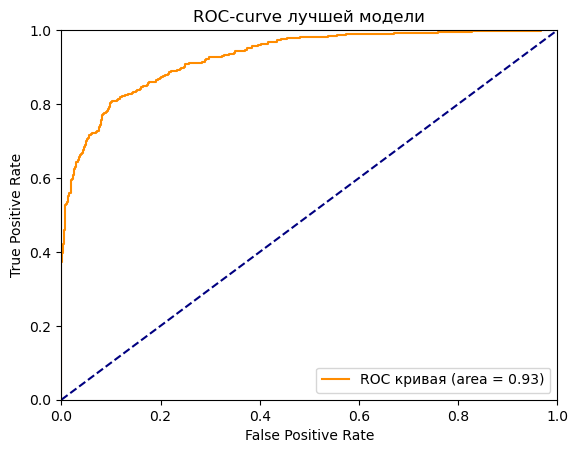

ROC AUC accuracy Время обучения Время предсказания
CatBoostClassifier   0.928    0.882          8.310              0.058

In [66]:
best_model = CBC(random_state = s,
                 eval_metric ='AUC',
                 early_stopping_rounds = 100,
                 verbose = 1000,
                 depth = 3, 
                 learning_rate = 0.1)

best_pipe = Pipeline([('oe', oe),
                      ('cbc', best_model)])

preds, best_roc_auc, accuracy, best_time_fit, best_time_pred = pred(best_pipe)

final = pd.DataFrame(columns=['ROC AUC','accuracy','Время обучения','Время предсказания'])
metrics(final,'CatBoostClassifier', best_roc_auc, best_time_fit, best_time_pred, accuracy)

Roc-auc больше 0.5 и accuracy больше 0.74 (доля наибольшего класса) говорят о том что модель работает лучше базовой модели, а значит адекватна. Посмотрим можно-ли улучшить точноть перебором порога.

In [79]:
t = pd.DataFrame({'y_true': y_test.copy(), 
                  'y_score': best_pipe.predict_proba(X_test)[:,1]})
t['y_pred_0.5'] = (t['y_score'] > 0.5)*1

max_score = accuracy
best_p = 0

for _ in np.arange(0.1,0.9,0.001):
    tt = t.copy()
    tt['y_pred_{}'.format(_)] = (tt['y_score'] >= _) * 1
    ac = accuracy_score(t['y_true'], tt['y_pred_{}'.format(_)])
    if ac > max_score:
        max_score = ac
        best_p = _
                                 

t['y_pred_{}'.format(best_p)] = (t['y_score'] >= best_p) * 1

print('Итог:')
print('Лучший порог', best_p)
print('Лучший accuracy-score', max_score)

Итог:
Лучший порог 0.4630000000000003
Лучший accuracy-score 0.8835888699602499


Незначительное улучшение.

## График важности признаков.

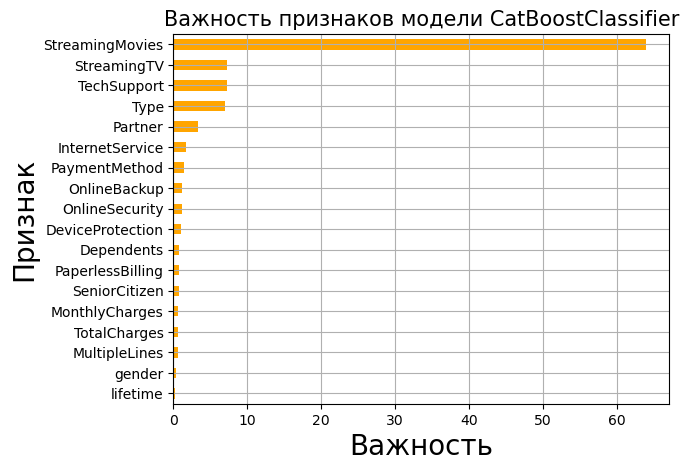

In [67]:
imp = grid_cb.best_estimator_.named_steps["cb"].feature_importances_ 
features = X_train.columns.to_list()
features_imp = pd.Series(imp,index=features).sort_values()
fig, ax = plt.subplots()
features_imp.plot.barh(features_imp, ax=ax,grid=True,color='orange')
ax.set_title("Важность признаков модели CatBoostClassifier",size=15)
ax.set_ylabel("Признак",size=20)
ax.set_xlabel("Важность",size=20)
plt.show()

Причудливое распределение важности признаков. На первом месте с огромным перевесом находится признак StreamingMovies, я предполагаю, что это связано с тем, что там так же как и в других полях взятых из таблицы интернет-услуг, там отмечается минус еденицей (-1) если клиент вообще не пользуется интернет-услугами. А как мы видели на этапе исследовательского анализа, что те кто подключил только услуги телефонии имеют отток всего 7%. А это почти в 4 раза меньше среднего значения и в 6 раз меньше тех, кто пользуется интернетом через Fiber Optic. И вероятно модель просто считывает это с ближайшего поля и поэтому придаёт ему такой вес.

## Итоги

Была проведена тчательная предобработка и обширный исследовательский анализ данных. Было обучено несколь моделей машинного обучения на кросс-валидации методом GridSearchCV и выбрана лучшая модель - 
CatBoostClassifier с следующими гиперпараметрами:
```python
              (random_state = s,
               eval_metric ='AUC',
               early_stopping_rounds = 100,
               verbose = 1000,
               depth = 3, 
               learning_rate = 0.1)
```
Модель была протестирована и на тестовой выборке достигнут результат метрики **ROC-AUC - 0.928**, что является отличным показателем. Точность модели ("accuracy") составляет 0.882

Результаты работы модели после обучения на всех данных:

In [68]:
final

ROC AUC accuracy Время обучения Время предсказания
CatBoostClassifier   0.928    0.882          8.310              0.058